# Predicting Influencers in Social Networks

By Fahd Alhazmi ([Twitter](https://twitter.com/fahd09) | [Github](https://github.com/fahd09))

## Introduction

In this notebook, we will use data from an old [kaggle competition](https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network) to predict influencers in social networks. The given data consistes of 5500 observations and 23 columns. Each observation desctibes two users (11 pre-computed features for each), in addition to a target variable that represent a human judegment about who is more influential ('1' means A is more influential than B and '0' for otherwise). More information is available in the competition website.

My goal of this notebook is to work on a machine learning model that can get us to the *top 10 participants* according to both the public and private leaderboard. 

First, we will load and explore the dataset. Then, we will add few more features to the dataset that will be later used for classification. Finally, we will use scikit-learn APIs to build rubost classifiers.

In [1]:
# Here we load our python packages are are going to use thourghout this tutorial and set some defaults for plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

Load the dataset as downloaded from Kaggle website

In [2]:
train = pd.read_csv('data/train.csv')

Check how many rows and columns we have

In [3]:
train.shape

(5500, 23)

.. and print the first 5 cases

In [4]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


We might have many questions about each of those features and what those numbers actually mean. The first 3 features after the target variable (follower count, following count, listed count) seem to refect actual counts, unlike others (like those related to mentions and retweets). Later on, we may want to do something about those counts. 

So before we go into any details, let's check the distribution of labels. Are classes balanced balanced ?

In [5]:
print('Frequencies of each label in the dataset: ')
train.Choice.value_counts(normalize=True)

Frequencies of each label in the dataset: 


1    0.509455
0    0.490545
Name: Choice, dtype: float64

Each class has a ~ 50% frequency so the classes are perfectly balanced.

In [6]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

It is always very useful to print out summary statistics about each column we have

In [7]:
train.describe().round(decimals=2)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,...,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00
mean,0.51,649883.95,12658.95,5952.45,2666.03,1032.37,6.01,1.11,9.09,5267.77,...,12738.26,5903.15,2554.60,997.15,6.10,1.11,9.51,5254.93,85.02,3745.18
std,0.50,2028787.44,49008.67,17339.14,29165.43,10954.95,9.52,1.91,18.31,28946.78,...,50054.52,16298.46,25088.73,9342.01,9.73,1.94,19.42,26778.82,106.69,5518.40
min,0.00,16.00,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,...,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.00,0.00
25%,0.00,2663.75,322.00,85.00,3.45,0.72,0.36,0.10,0.63,12.00,...,322.00,75.00,3.26,0.71,0.36,0.10,0.82,11.00,15.18,1206.50
50%,1.00,45589.00,778.00,932.00,48.77,14.03,2.30,0.34,3.56,195.00,...,773.00,890.00,48.77,14.03,2.25,0.34,3.34,190.00,54.93,2206.42
75%,1.00,392738.00,2838.00,6734.00,349.82,118.70,7.20,1.32,10.69,1323.00,...,2838.00,6734.00,374.37,107.08,6.87,1.32,10.60,1323.00,112.19,4349.91
max,1.00,36543194.00,1165830.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,...,664324.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,1861.58,75526.08


As we can see, most variables have a very skewed distributions. Standard deviations are very high and do not reflect a well-shaped data for analysis. We would want to convert all those features into a 'normal-like' distribution with a standard mean and a unit variance. We will accomplish all this in the 'Feature Engineering' section.

## Feature Engineering

The goal of the so-called _feature engineering_ is to prepare the dataset for our machine learning algorithms and make it easier to process. In this section, I will add few more columns and implement a log-transform to the variables so that we end up with normally shaped distributions for all variables.

The first thing I am going to do is to double the number of observations by swapping columns of A and B followed by flipping the target value.

In [8]:
def switch_colums(row):
    '''
    A function that creates a new record 1-BA for each 0-AB, so the dataset is doubled. 
    In other words, columns are switched and choice variable is flipped.
    '''
    if row[0] == 0:
        row[0] = 1
        return row.iloc[np.concatenate([np.array([0]),np.arange(12,23),np.arange(1,12)])]
    elif row[0] == 1:
        row[0] = 0
        return row.iloc[np.concatenate([np.array([0]),np.arange(12,23),np.arange(1,12)])]      
    
inverted_train = train.apply(switch_colums, axis=1)
inverted_train.columns = train.columns
train = pd.concat([train, inverted_train], axis=0)

Since we have two users with the same set of features, we will add new 11 features that represent the difference between A and B. Note this function assumes a well-shaped distributions (i.e. normal). So we will take care of that when we pass in the data. This function return a new dataframe of the new features.

In [9]:
def get_substracted_features(df):
    follower_count    = df['A_follower_count'] - df['B_follower_count']
    following_count   = df['A_following_count'] - df['B_following_count']
    listed_count      = df['A_listed_count'] - df['B_listed_count']
    mentions_received = df['A_mentions_received'] - df['B_mentions_received']
    retweets_received = df['A_retweets_received'] - df['B_retweets_received']
    mentions_sent     = df['A_mentions_sent'] - df['B_mentions_sent']
    retweets_sent     = df['A_retweets_sent'] - df['B_retweets_sent']
    posts             = df['A_posts'] - df['B_posts']
    network_feature_1 = df['A_network_feature_1'] - df['B_network_feature_1']
    network_feature_2 = df['A_network_feature_2'] - df['B_network_feature_2']
    network_feature_3 = df['A_network_feature_3'] - df['B_network_feature_3']
    combined = pd.concat([following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3], axis=1)
    combined.columns = ['s_following_count','s_listed_count','s_mentions_received','s_retweets_received','s_mentions_sent','s_retweets_sent','s_posts','s_network_feature_1','s_network_feature_2','s_network_feature_3']
    return combined

Second set of features to add is the ratio of follower_count to following count, ratio of mentions received to mentions sent and the same with retweets. The reason of taking those ratios is that inflencuers in social media usually have high ratio in all of those features. So we hope those new features can help in distinguising who is more influential. This function return a new dataframe containing the new features.

In [10]:
def get_ratio_features(df):
    follower_count_A    = df['A_follower_count']    / df['A_following_count'] 
    follower_count_B    = df['B_follower_count']    / df['B_following_count']
    mentions_A          = df['A_mentions_received'] / df['A_mentions_sent'] 
    retweets_A          = df['A_retweets_received'] / df['A_retweets_sent']
    mentions_B          = df['B_mentions_received'] / df['B_mentions_sent'] 
    retweets_B          = df['B_retweets_received'] / df['B_retweets_sent']
    posts_lists_A       = df['A_posts'] / df['A_listed_count']
    posts_lists_B       = df['B_posts'] / df['B_listed_count']
    combined = pd.concat([follower_count_A,follower_count_B,mentions_A,mentions_B,retweets_A,retweets_B,posts_lists_A,posts_lists_B], axis=1)
    combined.columns = ['r_follower_count_A','r_follower_count_B','r_mentions_A', 'r_mentions_B', 'r_RT_A', 'r_RT_B', 'r_postlist_A', 'r_postlist_B']
    return combined

In this function we will implement the last two functions and concatenate the new returned features to the original data we already have. Note that here we passed a log-transformed version of the data and not the actual counts. The reason for this is that the log-transformed data looks a lot more like a normal distribution. With the log operation we are basically squashing the extremely large values to be very small but still maintain their relative distance from the already smaller values.

Later, I also converted the ratio features into log values so that we have everything log-transformed.

In [11]:
def get_process_features(df):
    X_subst_features = get_substracted_features(np.log(df+1))     
    X_ratio_features = get_ratio_features( df+1)    
    X_features = pd.concat([np.log(df+1), X_subst_features, X_ratio_features], axis=1)

    X_features['r_follower_count_A'] = np.log(X_features['r_follower_count_A'])
    X_features['r_follower_count_B'] = np.log(X_features['r_follower_count_B'])
    X_features['r_mentions_A'] = np.log(X_features['r_mentions_A'])
    X_features['r_mentions_B'] = np.log(X_features['r_mentions_B'])
    X_features['r_RT_A'] = np.log(X_features['r_RT_A'])
    X_features['r_RT_B'] = np.log(X_features['r_RT_B'])
    X_features['r_postlist_A'] = np.log(X_features['r_postlist_A'])
    X_features['r_postlist_B'] = np.log(X_features['r_postlist_B'])
    
    return X_features

Now we use the function above, but we also want to exclude our target (binary) column from those transformations.

In [12]:
X_features = get_process_features(train.iloc[:,1:])

After getting the features transformed and ready; we want to make sure we got things right. So here we will plot what we have done so far and make sure we did reasonable transformations

In [13]:
X_features.columns

Index(['A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3',
       's_following_count', 's_listed_count', 's_mentions_received',
       's_retweets_received', 's_mentions_sent', 's_retweets_sent', 's_posts',
       's_network_feature_1', 's_network_feature_2', 's_network_feature_3',
       'r_follower_count_A', 'r_follower_count_B', 'r_mentions_A',
       'r_mentions_B', 'r_RT_A', 'r_RT_B', 'r_postlist_A', 'r_postlist_B'],
      dtype='object')

For this set of features, we wil plot A's values vs B's values and color the points by the target variable. If there were any "sensible" separation in any feature, this should reflect in a linear separation between 0-points and 1-points.

In [14]:
colnames = ['follower_count', 'following_count', 'listed_count',
'mentions_received', 'retweets_received', 'mentions_sent',
'retweets_sent', 'posts', 'network_feature_1',
'network_feature_2', 'network_feature_3']

In [15]:
def plot_pairs(X_features, colnames, cols = 3, figsize=(8,20), **args):
    fig = plt.figure(figsize=figsize)
    total = len(colnames)
    rows = total // cols 
    rows += total % cols
    position = range(1,total + 1)
    for k in range(total):
        ax = fig.add_subplot(rows,cols,position[k])
        plt.scatter(X_features[''.join('A_' + colnames[k])].values,  
                    X_features[''.join('B_' + colnames[k])].values, 
                    **args)
        plt.title(colnames[k])
        plt.axis('off')
    plt.show()

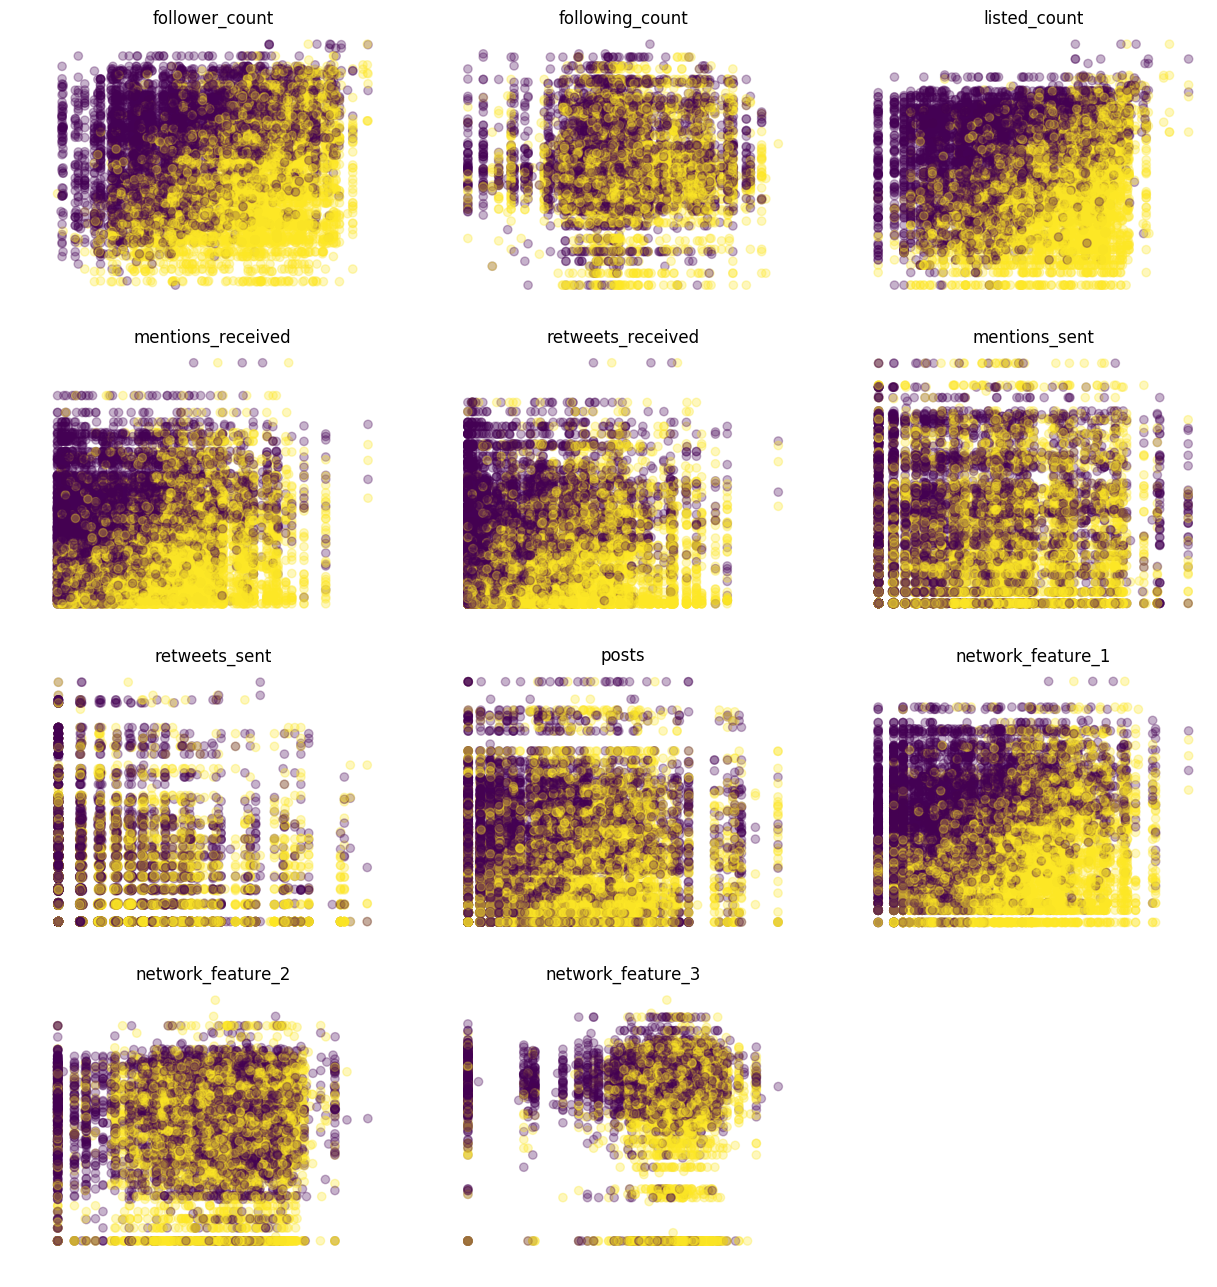

In [16]:
plot_pairs(X_features, colnames, cols = 3, figsize=(15,20), c=train['Choice'].values, alpha=.3)

As we can see, some features actually have a good separation between the two classes, but others are not as good. Next, we will plot distributions of the remaining features. Features that begins with _s_ are the substracted features and they should mimic the results in the previous plots. Features that begins with _r_ are the ratio features and they (hopefully) should give two distinct distributions as well.

In [17]:
features_names = ['s_following_count', 's_listed_count', 's_mentions_received',
       's_retweets_received', 's_mentions_sent', 's_retweets_sent', 's_posts',
       's_network_feature_1', 's_network_feature_2', 's_network_feature_3',
       'r_follower_count_A', 'r_follower_count_B', 'r_mentions_A',
       'r_mentions_B', 'r_RT_A', 'r_RT_B', 'r_postlist_A', 'r_postlist_B']

In [18]:
def plot_histograms(X_features, features_names, Y,  cols = 3, figsize=(8,20), **args):
    fig = plt.figure(figsize=figsize)
    total = len(features_names)
    rows = total // cols 
    rows += total % cols
    position = range(1,total + 1)
    for k in range(total):
        ax = fig.add_subplot(rows,cols,position[k])
        plt.hist(X_features[features_names[k]].values[Y==0], label='Zero', **args)
        plt.hist(X_features[features_names[k]].values[Y==1], label='One', **args)
        plt.title(features_names[k])
        plt.legend(loc='best')
        plt.axis('off')
    plt.show()

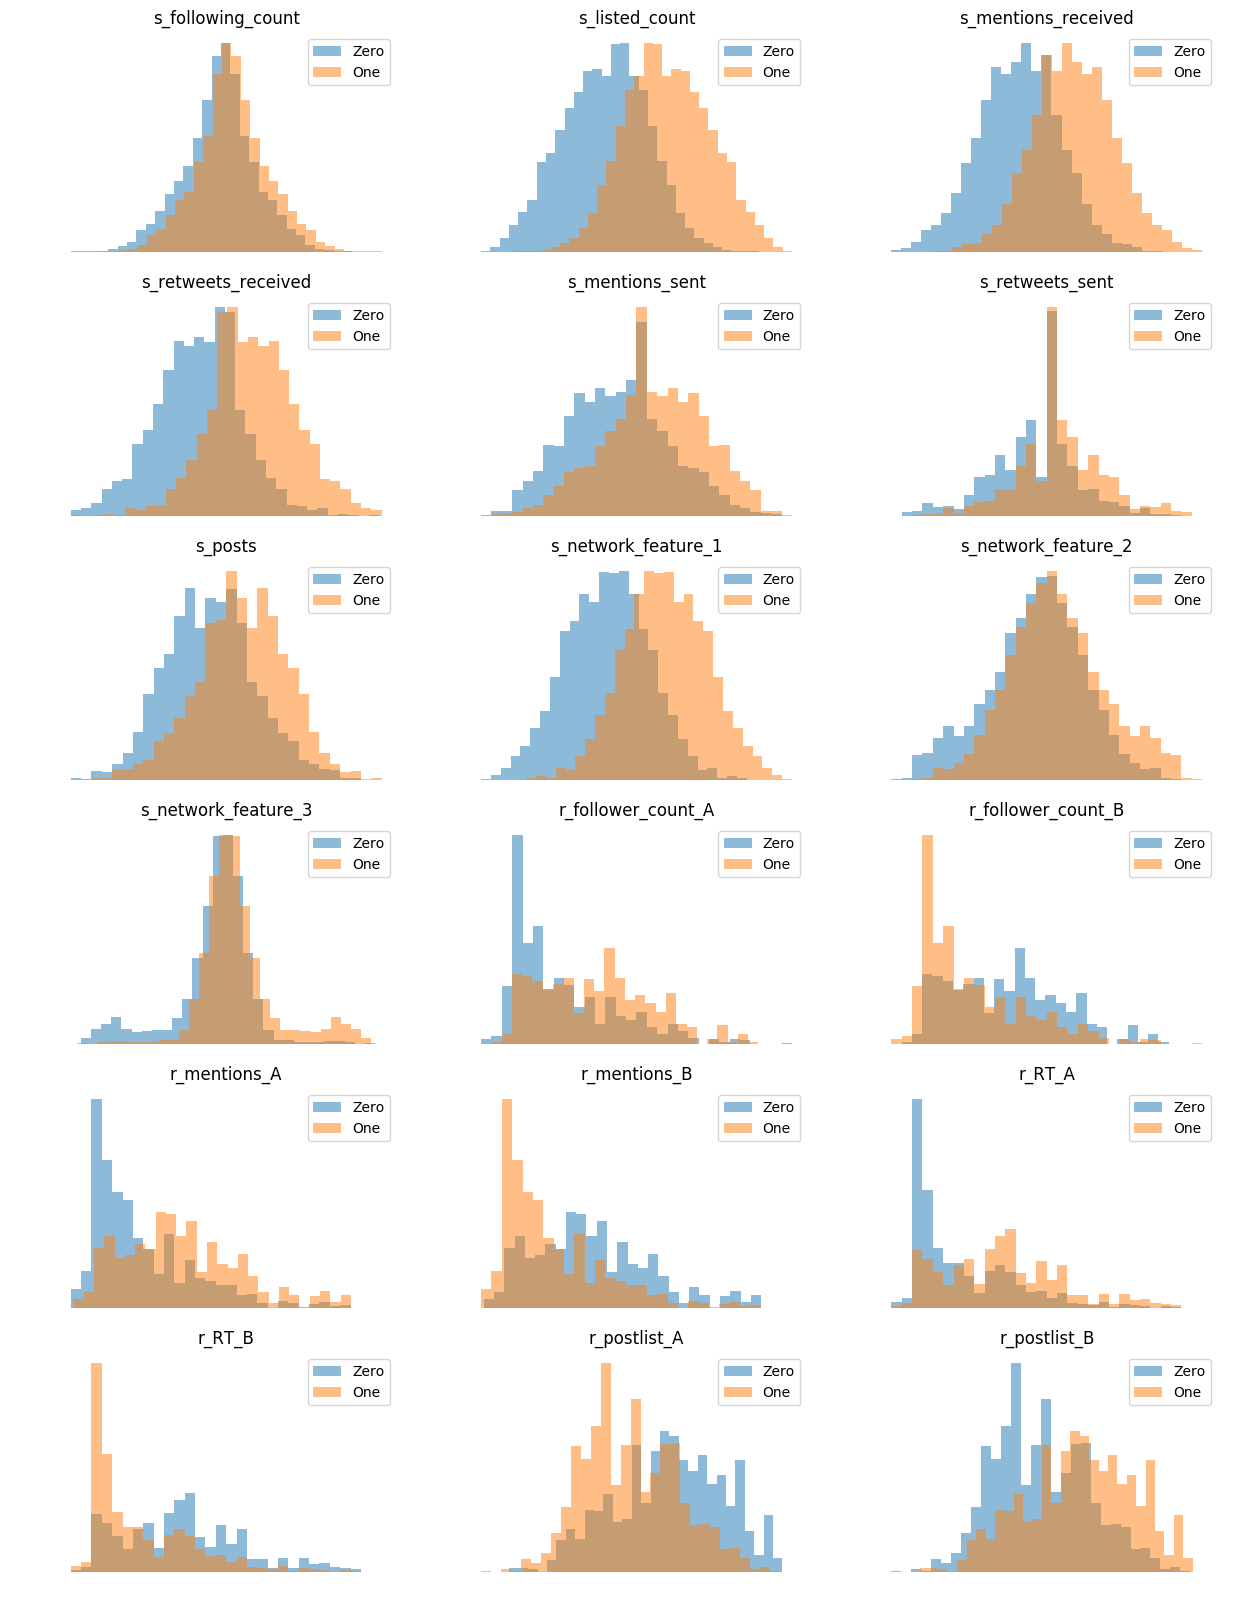

In [19]:
plot_histograms(X_features, features_names, train['Choice'].values, cols = 3, figsize=(15,20), alpha=.5, bins=30)

Hopefully we are not convinced that we got a good set. Note that the current set may be redundant in some way but we should not be too concerned about this as the machine learning algorithms we are going to use hopefully are not affected by this.

## Classification

In [20]:
# import our classes and classifiers
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Some utilities funcitons that we are going to use later

In [21]:
def preprocess_data(X, scaler=None):
    '''
    In this function, we will standardize data to have a mean of zero and a unit variance. The standardized data
    and a scalar object (to be used for testing data) are returned.
    '''
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [22]:
X_features.shape

(11000, 40)

In [23]:
X, scaler = preprocess_data(X_features) # standardize, and keep 'scalar' to be used with testing data
Y         = train.Choice.values         # response variable now as a column vector

Now we have the training data ready for classificaiton. 

Now, in each of those classifiers, we will first use GridSearchCV() to find the best parameters and those "best candidates" will later be used. Basically, we will define a range of values in "param_test" variable as a dictionary. Then, GridSearchCV() will iterate through all combinations and tell us what is the combination that made the best performance. Please note that some of those evaluations may take a very long time to compute.

### Fine-tuning a Simple Ligistic Regression Classifier

In [24]:
param_test = {
 'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
 'fit_intercept': [True, False]
}

In [25]:
gsearch1 = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=-1, iid=False, cv=5, verbose=0)
gsearch1.fit(X[:,22:],Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86204, std: 0.00613, params: {'C': 0.1, 'fit_intercept': True},
  mean: 0.86204, std: 0.00613, params: {'C': 0.1, 'fit_intercept': False},
  mean: 0.86215, std: 0.00604, params: {'C': 0.3, 'fit_intercept': True},
  mean: 0.86216, std: 0.00604, params: {'C': 0.3, 'fit_intercept': False},
  mean: 0.86216, std: 0.00601, params: {'C': 0.5, 'fit_intercept': True},
  mean: 0.86216, std: 0.00601, params: {'C': 0.5, 'fit_intercept': False},
  mean: 0.86215, std: 0.00598, params: {'C': 0.7, 'fit_intercept': True},
  mean: 0.86216, std: 0.00597, params: {'C': 0.7, 'fit_intercept': False},
  mean: 0.86215, std: 0.00597, params: {'C': 0.9, 'fit_intercept': True},
  mean: 0.86215, std: 0.00597, params: {'C': 0.9, 'fit_intercept': False},
  mean: 0.86215, std: 0.00597, params: {'C': 1.0, 'fit_intercept': True},
  mean: 0.86216, std: 0.00597, params: {'C': 1.0, 'fit_intercept': False}],
 {'C': 0.5, 'fit_intercept': True},
 0.8621629752066117)

### Fine-tuning a Gradient Boosting Classifier

In [26]:
param_test = {
 'learning_rate':[0.01, 0.1],
 'max_depth':[3,5,7],
 'subsample':[0.9, 0.8, 0.7]
}

In [27]:
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=-1, iid=False, cv=5, verbose=1)
gsearch1.fit(X,Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.8min finished


([mean: 0.85925, std: 0.00575, params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.9},
  mean: 0.85997, std: 0.00589, params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8},
  mean: 0.86007, std: 0.00569, params: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7},
  mean: 0.86664, std: 0.00506, params: {'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.9},
  mean: 0.86747, std: 0.00539, params: {'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.8},
  mean: 0.86804, std: 0.00528, params: {'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.7},
  mean: 0.86972, std: 0.00517, params: {'learning_rate': 0.01, 'max_depth': 7, 'subsample': 0.9},
  mean: 0.87026, std: 0.00550, params: {'learning_rate': 0.01, 'max_depth': 7, 'subsample': 0.8},
  mean: 0.87068, std: 0.00534, params: {'learning_rate': 0.01, 'max_depth': 7, 'subsample': 0.7},
  mean: 0.87554, std: 0.00457, params: {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9},
  mean: 0.87570, std:

### Fine-tuning an XGBoost Classifier

Similarly, I already fine-tuned XGBoost parameters but decided to delete it as it took a very large portion of this notebook. If you are interested, check this [tutorial](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In [28]:
def modelfit(alg, X, Y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=Y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    alg.fit(X, Y,eval_metric='auc')
    y_pred = alg.predict(X)
    y_pred_prob = alg.predict_proba(X)[:,1]
        
    print("\nModel Report")
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y, y_pred_prob))

In [29]:
xgb3 = XGBClassifier(learning_rate =0.01,n_estimators=1000,max_depth=5,min_child_weight=3,gamma=0,subsample=0.8,
    colsample_bytree=0.8,reg_alpha=1e-05,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

modelfit(xgb3, X, Y)


Model Report
AUC Score (Train): 0.928537


### Model Comparison

Now that we have setteled on the best parameters for each model, we will use k-fold cross-validation to compare their performance.

In [30]:
def compare_models(models, X, Y, n_splits=5, scoring = 'roc_auc', verbose=True, plot=True):
    '''
    Given a list of classes of classifiers, we will use kfold cross-validation to evaluate each of the models
    on X and Y and also print & plot the results.
    '''
    results = []
    names = []
    seed = 7
    for name, model in models:
        kfold = model_selection.KFold(n_splits=n_splits, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)        
        if verbose: 
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
    if plot:
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()        
    return results, names

We first define our classifier classes (based on the results of fine-tuning we did earlier; but we also make another variations of the same model to be used in voting classifier).

In [31]:
LG_clf1  = LogisticRegression(C=0.5, fit_intercept=False)
GBT_clf1 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, subsample=0.8)
XGB_clf1 = XGBClassifier(learning_rate =0.01,n_estimators=1000,max_depth=3,min_child_weight=3,gamma=0,subsample=0.8,
    colsample_bytree=0.8,reg_alpha=1e-05,objective= 'binary:logistic',nthread=-1,scale_pos_weight=1,seed=27)

Here, we will create a list of models we will use, and we also fill in that list with classifiers names and objects.

In [32]:
models = []
models.append(('LG1' , LG_clf1))
models.append(('GBT1', GBT_clf1))
models.append(('XGB1', XGB_clf1))

LG1: 0.861505 (0.006552)
GBT1: 0.872216 (0.002756)
XGB1: 0.875771 (0.004722)


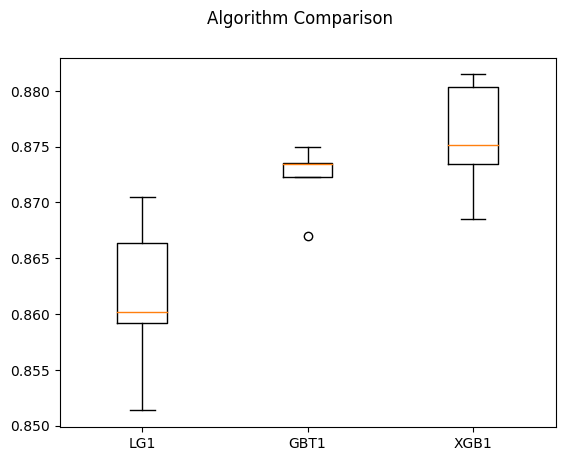

In [33]:
results, names = compare_models(models, X, Y)

### Ensemble of leaerners

Appearantly, some classifiers are better than others. At this point, you might be tempted to choose the classifier that achieved the best performance. However, I will take a step further and combine all of those classifiers into one big classifier but we are goinng to assign weights to each classifier to give more importance to the last two as they have better performance.

In [35]:
# Non- uniform (post-hoc) -- based on their performance
clf_voting = VotingClassifier(models, voting='soft', weights=[.1, .4, .5])
results = model_selection.cross_val_score(estimator=clf_voting, X=X, y=Y, scoring='roc_auc', verbose=True, n_jobs=-1, cv=4)

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.2min finished


In [36]:
print("VotingClassifier : %f (%f)" % (results.mean(), results.std()))

VotingClassifier : 0.878689 (0.002262)


This is impressive given the fact that none of the models is even close to this (collective) score. Of course, you can include more models in here with different (sub-optimal) parameters or you can tune the weights a little bit.

## Test data

Now it is time to predict the test data. Before doing so, we will fit our best classifier to all the data point we have and then we will do the same transformations we did to the training data.

In [37]:
model = clf_voting
model.fit(X, Y)

VotingClassifier(estimators=[('LG1', LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('GBT1', Gra...c', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8))],
         n_jobs=1, voting='soft', weights=[0.1, 0.4, 0.5])

In [38]:
X_test    = pd.read_csv('data/test.csv')

In [39]:
X_test.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [40]:
X_features = get_process_features(X_test)

Here, we will use the same scalar object we used for training data to scale the features.

In [41]:
X_test_scaled, _ = preprocess_data(X_features, scaler)

Finally, here we predict labels of the test data

In [42]:
preds = model.predict_proba(X_test_scaled)

Here we prepare the submission and save it on the disk

In [43]:
X_submit = pd.DataFrame({'Choice':preds[:,1]})

In [44]:
X_submit.index += 1

In [45]:
X_submit.head()

,Choice
1,0.236845
2,0.470716
3,0.054804
4,0.149151
5,0.362726


In [46]:
X_submit.to_csv('submission.csv', index_label='Id')

After you submit that to the competition webiste, you should get a private score of 0.87555 (8th in the leaderboard) and a public score of 0.87251 (7th in the leaderboard).

Of course, there are a lot of ways to make it even better. But that left as an exercise for the student ;)